# Eigenface Gesichtserkennung
* Autor: Prof. Dr. Johannes Maucher
* Datum: 27.11.2015

[Übersicht Ipython Notebooks im Data Mining Praktikum](Data Mining Praktikum.ipynb)

# Einführung
## Lernziele:

In diesem Versuch sollen Kenntnisse in folgenden Themen vermittelt werden:

* __Gesichtserkennung:__ mit der Eigenface Methode. 
* __Principal Component Analysis__
* __Bildverarbeitung__ mit Python.

Sämtliche Verfahren und Algorithmen werden in Python implementiert.

## Theorie zur Vorbereitung

Die Gesichtserkennung kann mit unterschiedlichen Ansätzen realisiert werden. In diesem Versuch wird ausschließlich der _Eigenface_-Ansatz vorgestellt. Dieser Ansatz basiert auf der _Principal Component Analysis (PCA)_ und wurde erstmals in [M. Turk, A. Pentland; Eigenfaces for Recognition](http://www.cs.ucsb.edu/%7Emturk/Papers/jcn.pdf) vorgestellt. Die Eigenface-Methode weist eine gute Performance im Fall biometrisch aufgenommener Gesichtsbilder auf.

### Das Prinzip der Eigenface Gesichtserkennung

Bilder mit $C$ Pixeln in der Breite und $R$ Pixeln in der Höhe können als $R \times C$ Matrizen abgespeichert werden. Handelt es sich um ein Schwarz-Weiß- oder Graustufen-Bild, dann wird pro Bild nur eine derartige Matrix benötigt. Der Eintrag in der i.ten Zeile und j.ten Spalte dieser Matrix definiert den Grauwert des entsprechenden Pixels. In Farbbildern werden je nach benutztem Farbraum mehrere  Matrizen pro Bild benötigt, wobei jede Matrix einen Farbkanal des Bildes repräsentiert. Für ein RGB-Bild werden z.B. 3 Matrizen für die Farbkanäle Rot, Grün und Blau benötigt. \\

Im Folgenden wird von quadratischen Graubildern mit $N \times N$ Pixeln ausgegangen. Wird jedes Pixel als ein Merkmal betrachtet, dann existieren insgesamt $N^2$ Merkmale, das Bild kann auch als ein Punkt im $N^2$-dimensionalen Raum betrachtet werden. Bilder der Auflösung $256 \times 256$ müßten also im $65536$-dimensionalen Raum beschrieben werden. Entsprechend komplex wäre die notwendige Verarbeitung. Ist jedoch bekannt, dass in einer Menge von Bildern jeweils ein gleichartiges Objekt abgebildet ist, z.B. wenn alle Bilder ausschließlich je ein Gesicht enthalten, dann existieren große Abhängigkeiten zwischen diesen Bildern. Geometrisch ausgedrückt bedeutet dies, dass die Punkte, welche die Menge der gleichartigen Bilder beschreiben, nicht gleichmäßig über den $N^2$-dimensionalen Raum verteilt sind, sondern in einen relativ kleinen Unterraum mit $K<<N^2$ Dimensionen nahezu vollständig beschrieben werden können. Jede dieser $K$ Dimensionen beschreibt ein für die Kategorie (z.B. Gesichtsbilder) relevantes Merkmal. Im Fall der Gesichtserkennung werden die relevanten Merkmale auch als Eigenfaces bezeichnet. Jedes Eigenface kann als Bild dargestellt werden, welches ein bestimmtes Gesichtsmerkmal besonders hervorhebt. Jedes individuelle Bild der Kategorie (d.h. jedes Gesicht) kann dann als Linearkombination der $K$ relevanten Merkmale (der $K$ Eigenfaces) beschrieben werden.\\

Das Problem besteht nun zunächst darin, aus einer Menge von Bildern der gleichen Kategorie die relevanten Merkmale zu finden. Dieses Problem wird durch die Principal Component Analysis (PCA) gelöst. Die PCA, findet in einer Menge von Bildern der gleichen Kategorie die Hauptachsen, also die Richtungen im $N^2$-dimensionalen Raum, entlang derer die Varianz zwischen den gegebenen Bildern am stärksten ist. Der $N^2$-dimensionale Pixelraum wird dann in einen Raum, der durch die gefundenen Hauptachsen aufgespannt wird, transformiert. In diesem in der Anzahl der Dimensionen stark reduzierten Raum wird dann die Bilderkennung durchgeführt. Der hier skizzierte Ansatz der Eigenfaces für die Gesichtserkennung wurde erstmalig in [M. Turk, A. Pentland; Eigenfaces for Recognition](http://www.cs.ucsb.edu/%7Emturk/Papers/jcn.pdf) beschrieben.

### Genereller Ablauf

Die Gesichtserkennung besteht aus 2 Phasen. In der Trainingsphase werden die Gesichtsbilder der zu erkennenden Personen eingelesen und für diese mit der PCA der Eigenface-Raum berechnet. In der Erkennungsphase wird ein neu aufgenommenes Bild in den Eigenface-Raum transformiert und dort dem naheliegendsten Bild aus der Trainingsmenge zugeordnet.

#### Trainingsphase

1. Lese Gesichtsbilder der Personen, die erkannt werden sollen ein. Die Menge dieser Bilder definiert das Trainingsset
2. Berechne mit der PCA den Eigenface-Raum. Dabei werden nur die K Dimensionen, welche zu den Eigenvektoren mit den größten Eigenwerten gehören ausgewählt. Die zu den K Dimensionen (Eigenvektoren) gehörenden Bilder sind die Eigenfaces.
3. Transformiere jedes Bild der Trainingsmenge in den Eigenface-Raum und erhalte so die entsprechende Repräsentation des Bildes als Punkt im Eigenface-Raum.

#### Erkennungsphase

1. Transformiere das zu erkennende Bild in den Eigenface-Raum und berechne dort die Koordinaten des Bildes hinsichtlich aller K-Dimensionen (Eigenfaces)
2. Bestimme ob das zu erkennende Bild überhaupt eine Gesicht darstellt
3. Bestimme ob das Gesicht zu einer bekannten Person, deren Bild in der Trainingsmenge enthalten ist, gehört.

#### Update (optional)

Füge das erkannte Bild zur Menge der Trainingsbilder hinzu und führe die Schritte der Trainingsphase durch.

### Bestimmung der Eigenfaces
<a id='theoryEig'></a>
Es werden zunächst $M$ Gesichtsbilder der zu erkennenden Personen eingelesen (von jeder zu erkennenden Personen möglichst mehrere Bilder). Es wird davon ausgegangen, dass jedes der Bilder $C$ Pixel breit und $R$ Pixel hoch ist. Das Bild kann dann als $R \times C$ Matrix dargestellt werden. Im Fall eines Graustufenbildes repräsentieren die Pixelwerte den entsprechenden Grauwert. Nach dem Einlesen werden die Bildmatrizen als eindimensionale Vektoren dargestellt. Für diese Umformung werden die Zeilen jeder Matrix von oben nach unten ausgelesen und hintereinander gereiht. Jedes Bild wird dann durch einen Vektor der Länge $Z=R \cdot C$ repräsentiert und kann als Punkt im Z-dimensionalen Raum dargestellt werden. Die M Bildvektoren werden im folgenden mit $$\Gamma _1, \Gamma_2, \ldots, \Gamma_M$$ bezeichnet.

Im nächsten Schritt wird das Durchschnittsbild berechnet
$$
\overline{\Gamma}=\frac{1}{M}\sum_{i=1}^{M}{\Gamma_{i}}
$$

Dieses Durchschnittsbild wird von allen Bildern $\Gamma_i$ abgezogen. Die Menge der so gewonnenen Bildrepräsentationen
$$
\Phi_i=\Gamma_i - \overline{\Gamma}
$$

ist dann mittelwertsfrei. Die Menge  $\Phi_1, \Phi_2, \ldots, \Phi_M$ wird dann einer Principal Component Analysis (PCA) (siehe auch [J. Maucher; Feature Selection and Extraction](https://docs.google.com/document/d/13cc9RGeIvsV5JsC-MsymJ6aaJs_ZsUKEwqaOOO8IL8Q/edit?usp=sharing)) unterzogen. Hierzu werden die mittelwertfreien Bildrepräsentationen $\Phi_i$ in die Spalten einer Matrix geschrieben. Diese Matrix wird im Folgenden mit $X$ bezeichnet. Unter der Annahme, dass die $\Phi_i$ bereits als Spaltenvektoren vorliegen, ist die Matrix $X$ definiert als:

$$
X=\left[ \Phi_1, \Phi_2, \ldots, \Phi_M \right].
$$

Die entsprechende Kovarianzmatrix ist dann
$$
CV=X \cdot X^T.
$$

Für die PCA müssten als nächstes eigentlich die Eigenvektoren und Eigenwerte der Kovarianzmatrix $CV$ berechnet werden. Für den vorliegenden Fall kann allerdings die hierfür notwendige Berechnung aus Komplexitätsgründen nicht realisiert werden. Man beachte dass die Matrix $CV$  $Z$ Spalten und $Z$ Zeilen enthält ($Z$ ist die Anzahl der Pixel in einem Bild) und für diese $Z$ Eigenvektoren und Eigenwerte existieren. Wie in [M. Turk, A. Pentland; Eigenfaces for Recognition](http://www.cs.ucsb.edu/%7Emturk/Papers/jcn.pdf) beschrieben, existieren im Fall, dass die Anzahl der Bilder $M$ wesentlich kleiner als die Anzahl der Pixel $Z$ ist, nur $M-1$ __relevante Eigenvektoren__, die Eigenwerte aller anderen Eigenvektoren liegen nahe bei Null. Der in [M. Turk, A. Pentland; Eigenfaces for Recognition](http://www.cs.ucsb.edu/%7Emturk/Papers/jcn.pdf) beschriebene Ansatz geht nun von der $M \times M$ Matrix

$$
X^T \cdot X
$$

aus, für welche die Eigenvektoren und Eigenwerte für eine moderate Bildanzahl $M$ gut berechnet werden können. Per Definition gilt für die Eigenvektoren $\mathbf{v}_i$ und Eigenwerte $\mu_i$ dieser Matrix:

$$
X^T \cdot X \cdot \mathbf{v}_i = \mu_i \mathbf{v}_i .
$$

Werden beide Seiten dieser Matrix linksseitig mit der Matrix $X$ multipliziert,

$$
X \cdot X^T \cdot X \cdot \mathbf{v}_i = \mu_i X \mathbf{v}_i,
$$
dann ist daraus zu erkennen, dass die $M$ Vektoren
$$
\mathbf{u}_i=X \mathbf{v}_i
$$

die Eigenvektoren der Matrix $$CV=X \cdot X^T$$ sind. D.h. es können zunächst die M Eigenvektoren der relativ kleinen Matrix $X^T \cdot X$ bestimmt und aus diesen durch eine einfache Multiplikation mit der Matrix $X$ die relevanten Eigenvektoren der Matrix $CV$ berechnet werden. Da die Matrix $X$ die $M$ Bildrepräsentationen  $\Phi_i$ als Spalten enthält, können die gesuchten Eigenvektoren auch als Linearkombination der $M$ Bilder der Trainingsmenge beschrieben werden:

$$
\mathbf{u}_i=\sum_{k=1}^{M}{v_{i,k}\Phi_k}
$$

wobei mit $v_{i,k}$ die $k.$te Komponente des Vektors $\mathbf{v}_i$ bezeichnet wird. Die Eigenvektoren $\mathbf{u}_i$ werden auch Eigenfaces genannt. Per Definition sind die Eigenvektoren paarweise orthogonal. Jeder Eigenvektor ist ein Spaltenvektor mit $Z$ (=Anzahl der Pixel) Komponenten.

Die $M$ Eigenvektoren werden dann entsprechend der Größe der zugehörigen Eigenwerte $\mu_i$ geordnet. Für die weiteren Schritte kann zum Zwecke einer weiteren Komplexitätsreduktion eine Untermenge der $K$ relevantesten Eigenvektoren benutzt werden (also der $K$ Eigenvektoren mit den höchsten Eigenwerten). Beispielsweise ist in [M. Turk, A. Pentland; Eigenfaces for Recognition](http://www.cs.ucsb.edu/%7Emturk/Papers/jcn.pdf) für die Erkennung von $M=16$ Personen und eine Auflösung von $256 \times 256$ Pixel meist $K=7$ Eigenvektoren für eine gute Erkennung ausgereicht.

### Gesichtserkennung im Eigenspace
<a id='theoryRec'></a>

Die $K$ ausgewählten Eigenvektoren $\mathbf{u}_1,\mathbf{u}_2,\ldots \mathbf{u}_K$ spannen einen $K-$dimensionalen Raum, den sogenannten Eigenspace auf. Die $K$ Vektoren repräsentieren die $K$ Merkmale hinsichtlich derer die Bilder der Trainingsdatenmenge am stärksten variieren.

Für die Bilderkennung wird jetzt jedes Bild, also sowohl die Bilder aus der Trainingsmenge als auch die zu erkennenden Bilder, in den Eigenspace transformiert. Jedes Bild stellt einen Punkt im Eigenspace dar. Für die Erkennung kann einfach die Distanz des zu erkennenden Bildes zu allen Bildern der Trainingsmenge berechnet werden. Das zu erkennende Bild wird der Person (Bildklasse) zugeordnet, deren Punkt im Eigenspace dem Punkt des zu erkennenden Bildes am nächsten liegt.

Die $K$ Komponenten eines Trainingsbildes werden berechnet, indem das Bild auf den jeweiligen Eigenvektor projiziert wird. Demnach ist die $k.$te Komponente des $i.$ten Trainingsbildes  $\Phi_i$:
$$
\omega_{k,i}=\mathbf{u}_k^T \Phi_i
$$

Der dem Bild $\Phi_i$ entsprechende Punkt im Eigenspace ist dann
$$
\mathbf{w}_i=[\omega_{1,i},\omega_{2,i},\ldots,\omega_{K,i}]. 
$$

Wird mit $\Gamma$ das zu erkennende Bild und mit $\Phi=\Gamma - \overline{\Gamma}$ die um den Mittelwert der Trainingsbilder subtrahierte Version des Bildes bezeichnet, dann sind
$$
\omega_{k}=\mathbf{u}_k^T \Phi
$$

die Koordinaten der Projektion von $\Phi$ in den Eigenspace und der dieses Bild repräsentierende Punkt
$$
\mathbf{w}=[\omega_{1},\omega_{2},\ldots,\omega_{K}].
$$

Das zu erkennende Bild wird dann dem Trainingsbild $\Phi_j$ zugeordnet, für welches gilt:
$$
j=argmin_{i} \left\{ d(\mathbf{w},\mathbf{w}_i) \right\}
$$

wobei mit $d(\mathbf{w},\mathbf{w}_i)$ die euklidische Distanz zwischen den Projektionen von $\Phi$ und $\Phi_i$ bezeichnet wird.

__Optional:__ Falls $\Phi_i$ nicht das einzige Bild einer Person in der Trainingsmenge ist, sondern für die entsprechende Person mehrere Trainingsbilder vorliegen, wird in der Distanzberechnung nicht $\Phi_i$, sondern der Mittelwert über alle zu dieser Person gehörenden Bilder eingesetzt:

$$
\overline{\Phi}=\frac{1}{|W|}\sum_{w \in W}^{}{\Phi_w} .
$$

Dabei bezeichnet $W$ die Menge aller der Indizees $w$, für die die $\Phi_w$ zur gleichen Person gehören. Im Praktikumsversuch muss diese Option nicht implementiert werden. Die im folgenden Abschnitt beschriebene Versuchsdurchführung bezieht sich auf den Fall, dass nur die Distanz zu Einzelbildern berechnet wird und das nächstliegende Bild ausgegeben wird.

Für die Mindestdistanz
$$
\epsilon =\min_{i} \left\{ d(\Phi,\Phi_i) \right\}
$$

wird in der Regel eine Schwelle $T$ definiert. Wenn $\epsilon > T$ ist, also eine relativ große Distanz zwischen dem zu erkennenden Bild und dem nächstliegenden Bild aus der Trainingsmenge besteht, wird davon ausgegangen, dass es sich um ein unbekanntes Gesicht handelt. Optional könnte dieses unbekannte Gesicht in die Trainingsmenge aufgenommen werden.

Schließlich muss noch der Fall behandelt werden, dass das eingelesene Bild kein Gesicht darstellt. Aufgrund der starken Projektion vom ursprünglichen Bildraum in den Eigenspace kann dieser Fall nicht durch eine Schwelle auf den Fehler $\epsilon$ erkannt werden. Es kann durchaus sein, dass ein Nicht-Gesichtsbild in die Umgebung eines Gesichtsbild im Eigenspace projiziert wird. Ein Nicht-Gesichtsbild wird aber eine relativ große Distanz $d(\Phi,\Phi_f)$ zwischen

$$
\Phi=\Gamma - \overline{\Gamma}
$$
und der Repräsentation im Eigenspace
$$
\Phi_f=\sum_{k=1}^{K}{\omega_k}\mathbf{u}_k
$$
aufweisen. Durch die Definition einer weiteren Schwelle $S$ auf $d(\Phi,\Phi_f)$ kann also erkannt werden, ob es sich überhaupt um ein Gesicht handelt. Im Versuch ist davon auszugehen, dass nur Gesichtsbilder verwendet werden, d.h. es muss nur der Test gegen die Schwelle $\epsilon$ implementiert werden.


 ## Vor dem Versuch zu klärende Fragen
 
 * Was sind Eigenvektoren und Eigenwerte?

* Was versteht man unter Eigenfaces?

Eigentlich stellt jedes Pixel eines Bildes eine Dimension im Raum dar. Ziel ist es einen Kompromis zwischen maximaler und minimaler Bildinforamtions zu schließen, um Bilder als Bilder zu erkennen und voneinander unterscheiden zu können und möglichst wenig komplexität in die Berechnungen zu bringen. Eigenfaces sind die relevanten Merkmale eines Bilds, also die optimale und wichtigste Merkmalsmenge. Bei einem Graustufenbild fehlen Farbwerte, dass heißt, sie können mit Graustufenwerte durch einen eindimensionalen Vektor repräsentiert werden. Diese Vektoren nennt man Eigenfaces. Mehrere Eigenfaces zusammen genommen bilden den Eigenspace, einen Unterraum der Bildmenge.       

* Die PCA ist u.a. im entsprechenden Kapitel des Dokuments [J. Maucher; Feature Selection and Extraction](https://docs.google.com/document/d/13cc9RGeIvsV5JsC-MsymJ6aaJs_ZsUKEwqaOOO8IL8Q/edit?usp=sharing)) beschrieben. Wie kann mit der PCA eine Dimensionalitätsreduktion durchgeführt werden?

Wie erwähnt, bildet jedes Pixel eine eigene Dimension. Nicht jedes Pixel ist für die Bilderkennung gleich relevant und nicht jeder Wert des Pixels. In unserem Beispiel werden Farbwerte komplett ignoriert und es werden nur Graustufen betrachtet. 

- 8*8 Matrizen mit Graustufen 
- Tiefpassfilter => Hohe Frequenzen werden gefiltert, da sie weniger aussagekraft über ein Bild besitzen

* Wie werden mit dem Python Modul \emph{Image} Bilder in ein Python-Programm geladen?

# Versuchsdurchführung

## Einlesen der Gesichtsbilder in Numpy Arrays
Laden Sie vom Skripteserver das Verzeichnis _Gesichtsbilder_ auf Ihren Rechner. Darin enthalten sind

* das Unterverzeichnis _training_, welches je 3 Bilder jedes Studenten enthält,
* das Unterverzeichnis _test_, welches die nicht in _training_ enthaltenen Bilder enthält. Ein Bild von jedem Studenten.

Mit der unten gegebenen Funktion _parseDirectory(directoryName,extension)_ wird eine Liste aller Dateinamen des Typs _extension_ im Verzeichnis _directoryName_ angelegt.

__Aufgabe:__

1. Legen Sie mit dieser Funktion eine Liste mit allen Dateinamen des Typs _extension='.png'_ im Verzeichnis _training_ (enthält die Trainingsbilder) an.
2. Implementieren Sie eine Funktion _readImageToNumpyData(imageList)_, der eine Liste aller Dateinamen der Trainingsbilder übergeben wird. Die Funktion gibt ein Numpy-Array zurück. Jede Zeile dieses Arrays enthält ein _.png_-Bild in serialisierter Form. Hierzu ist jedes einzelne Bild zunächst mit der Funktion [_matplotlib.image.imread(filename)_](http://matplotlib.org/1.3.0/users/image_tutorial.html) in ein zweidimensionales Numpy Array _img_ zu lesen. Durch den Aufruf von _img.shape=(1,-1)_ wird das zweidimensionale Numpy Array zu einem eindimensionalen Array serialisiert. Danach muss eine Normierung aller Werte in den Bereich zwischen 0 und 1 durchgeführt werden. Hierzu müssen alle Pixelwerte eines Bildes durch den im jeweiligen Bild vorkommenden Maximalwert geteilt werden.  

In [115]:
%matplotlib inline
from os.path import isdir,join,normpath
from os import listdir
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as mplimg

In [116]:
def parseDirectory(directoryName,extension):
    '''This method returns a list of all filenames in the Directory directoryName. 
    For each file the complete absolute path is given in a normalized manner (with 
    double backslashes). Moreover only files with the specified extension are returned in 
    the list.
    '''
    if not isdir(directoryName): return
    imagefilenameslist=sorted([
        normpath(join(directoryName, fname))
        for fname in listdir(directoryName)
        if fname.lower().endswith('.'+extension)            
        ])
    return imagefilenameslist

In [117]:
trainpaths = parseDirectory('Resources/Gesichtsbilder/training','png')
testpaths = parseDirectory('Resources/Gesichtsbilder/test','png')

In [118]:
from sklearn import preprocessing

def normalize(nparray):
    return nparray/np.max(nparray)

def readImageToNumpyData(imageList):
    return np.array([normalize(mplimg.imread(filename).reshape(-1)) for filename in imageList])

trainImg = readImageToNumpyData(trainpaths)
print trainImg.max()
print trainImg.min()

1.0
0.0


## Berechnung des Durchschnittbildes

__Aufgaben:__

1. Die von der Funktion _convertImgListToNumpyData(imgList)_ zurückgelieferte Matrix enthält in ihren Zeilen alle Trainingsbilder. Aus diesen Trainingsbildern ist nach der Gleichung für [$\overline{\Gamma}$](#theoryEig) das Durchschnittsbild zu berechnen, z.B. durch Anwendung der Numpy-Funktion _average_. Das Durchschnittsbild ist von allen Bildern abzuziehen (Gleichung [$\Phi_i$](#theoryEig)). Das daraus resultierende Numpy-Array enthält die mittelwertfreien Repräsentationen der Trainingsbilder und wird im Folgenden mit _NormedArrayOfFaces_ bezeichnet.

2. Zeigen Sie das Durchschnittsbild mithilfe der [matplotlib.pyplot_-Funktion _imshow()](http://matplotlib.org/1.3.0/users/image_tutorial.html) an. Hierzu muss das eindimensionale Numpy Array, welches das Durchschnittsbild enthält, in ein zweidimensionales Array der ursprünglichen Bildgröße umgewandelt werden (Numpy Funktionen _shape()_ oder _reshape()_)  

__Wichtiger Hinweis:__ Das Numpy-Array __NormedArrayOfFaces__ ist die Transpornierte $X^T$ der Matrix $X$ aus Gleichung [$X$](#theoryEig).

[[-0.00034219 -0.00049764 -0.00459981 ..., -0.03045195 -0.02863732
   0.00247678]
 [-0.00241941 -0.00257486 -0.00208986 ...,  0.05739644  0.04990691
   0.02545583]
 [ 0.01258719  0.01243174  0.01291674 ...,  0.10820818  0.09613332
   0.03008506]
 ..., 
 [ 0.02522618  0.02507073  0.02555573 ...,  0.26412329  0.25700289
   0.24272406]
 [ 0.0182578   0.01810235  0.02315354 ...,  0.20118895  0.1847178
   0.17913464]
 [ 0.02840942  0.02825397  0.01981044 ...,  0.23015586  0.22738332
   0.22180015]]


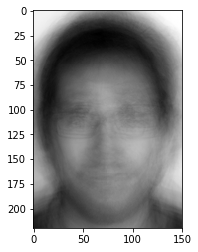

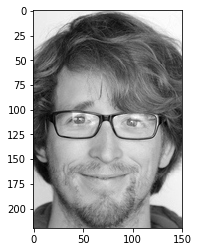

In [119]:
#1
averageimg = np.average(trainImg, axis=0)
normedArrayOfFaces = np.array([matrix-averageimg for matrix in trainImg])
print normedArrayOfFaces

#2
plt.imshow(averageimg.reshape(220, 150), cmap='gray')
plt.show()
plt.imshow(trainImg[0].reshape(220, 150), cmap='gray')

## Berechnung der Eigenfaces

__Aufgaben:__

1. Implementieren Sie die Funktion _calculateEigenfaces(adjfaces,width,height)_. Dieser Funktion werden die normierten Bilder _NormedArrayOfFaces_ zusammen mit der Bildbreite und -höhe übergeben. Zurück liefert die Funktion ein Numpy-Array, dessen Zeilen die berechneten normierten Eigenfaces sind. Die Berechnung der Eigenfaces ist im Theorieteil Abschnitt [Bestimmung der Eigenfaces](#theoryEig) beschrieben. Für die Python-Implementierung können Sie folgende Hinweise berücksichtigen:
    * Berechnung der transponierten eines Numpy-Arrays $A$ mit der Numpy-Methode _transpose()_
    * Matrixmultiplikation zweier Numpy-Arrays $A$ und $B$ mit der Numpy-Funktion _dot()_
    * Berechnung der Eigenvektoren und Eigenvalues eines Numpy Arrays $A$ mit der Numpy-Funktion _linalg.eigh()_
    * Sortierung von Numpy-Arrays mit den Numpy-Funktionen _sort()_ und _argsort()_.
2. Aus dem von der Funktion _calculateEigenfaces(adjfaces,width,height)_ zurück gelieferten Array von Eigenfaces sind die $K$ relevantesten auszuwählen. Dieses reduzierte Array wird im Folgenden mit _Usub_ bezeichnet. Im Versuch kann $K=6$ eingestellt werden.
3. Zeigen Sie die $K=6$ wichtigsten Eigenfaces als Bilder mit der [matplotlib.pyplot_-Funktion _imshow()](http://matplotlib.org/1.3.0/users/image_tutorial.html) an.

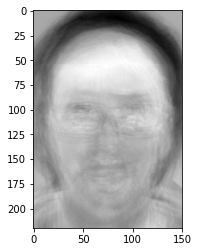

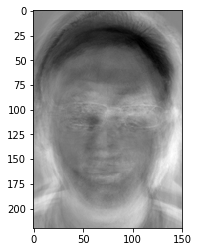

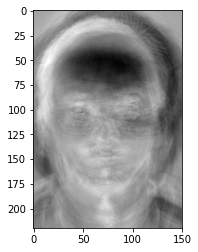

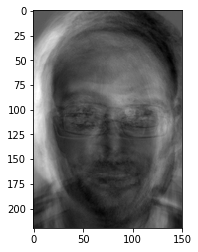

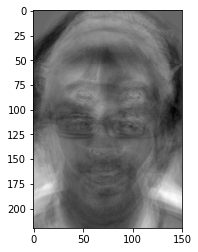

[[[-0.15930466 -0.15379772 -0.15075774 ..., -0.08606664 -0.08327061
   -0.08256993]
  [-0.15817395 -0.15455903 -0.15391977 ..., -0.08821423 -0.0885613
   -0.08882707]
  [-0.15462063 -0.15430517 -0.15137184 ..., -0.09096804 -0.08839894
   -0.09101017]
  ..., 
  [-0.24686694 -0.2910412  -0.29251376 ..., -0.44332662 -0.46733481
   -0.54132754]
  [-0.26252875 -0.27200404 -0.26285374 ..., -0.38759211 -0.40385434
   -0.46921286]
  [-0.28037402 -0.26744571 -0.26167265 ..., -0.38767949 -0.39027473
   -0.43660945]]

 [[ 0.03526073  0.0287385   0.03095269 ...,  0.05024832  0.04860003
    0.04633017]
  [ 0.03563319  0.03142043  0.02939569 ...,  0.04910408  0.04845487
    0.05068836]
  [ 0.03377844  0.03576329  0.03028301 ...,  0.04493806  0.05186366
    0.05009159]
  ..., 
  [ 0.29753396  0.26608628  0.26767445 ...,  0.56007028  0.617607
    0.64111823]
  [ 0.28789857  0.28476048  0.27562732 ...,  0.50320244  0.51877105
    0.57261193]
  [ 0.27715865  0.28605282  0.26620448 ...,  0.51426768  0.52

In [120]:
K = 5
width = 220
height = 150

#1
def calculateEigenfaces(adjfaces,width,height):
    '''calculates eigenfaces in their original width and height
    and retruns them in descending eigenvalue order'''
    X=adjfaces.T
    CV = np.dot(adjfaces,X)
    eigen_vectors = np.linalg.eigh(CV)[1]
    eigen_faces = np.dot(X,eigen_vectors).T
    return eigen_faces[::-1].reshape(adjfaces.shape[0],width, height)

eigen_faces = calculateEigenfaces(normedArrayOfFaces, 220, 150)

#2 – subselection of first K eigenvectors
Usub = eigen_faces[:K]

#3
def print_eigen_faces(eigenfaces):
    for eigenvector in eigenfaces:
        plt.imshow(eigenvector,cmap='gray')
        plt.show()

print_eigen_faces(Usub)
print Usub

## Transformation der normierten Trainingsbilder in den Eigenface Raum

__Aufgabe:__

Die im vorigen Schritt angelegten $K$ relevantesten Eigenfaces spannen den sogenannten _Eigenface-Raum_ auf. Für jedes der normierten Trainingsbilder, also für jede Zeile aus _NormedArrayOfFaces_, sind die Koordinaten im Eigenface-Raum entsprechend der Gleichung für [$\omega_{k,i}$](#theoryRec) definierten Transformation zu berechnen.

In [121]:
print Usub.reshape(K,-1)[0].shape
print normedArrayOfFaces[0].shape

def createEigenSpace(images,eigenfaces):
    return np.array([[np.dot(eigenvektor.reshape(-1), image) for eigenvektor in eigenfaces] for image in images], dtype=np.float128)
    
EigenSpace = createEigenSpace(normedArrayOfFaces, Usub)

(33000,)
(33000,)


## Erkennung

__Aufgaben:__

1. Wählen Sie ein Bild aus dem Verzeichnis _test_ aus. Das ausgewählte zu erkennende Bild ist als Numpy-Array darzustellen. Eine Normierung der Pixelwerte in den Bereich zwischen 0 und 1 ist durchzuführen (wie bereits oben beschrieben). Schließlich muss auch von diesem Bild das Durchschnittsbild aller Trainingsbilder abgezogen werden. Diese Prozessschritte entsprechen der oben beschriebenen Vorverarbeitung der Trainingsbilder. Das resultierende normierte und mittelwertfreie Bild wird im Folgenden mit _NormedTestFace_ bezeichnet.
3. Danach sind die Koordinaten des _NormedTestFace_ im Eigenface-Raum nach Gleichung [$\omega_{k}$](#theoryRec) zu berechnen und das in diesem Raum nächstliegende Trainingsbild zu bestimmen.

[ 3417.0224  2528.9151  2564.3811  5664.2849  5513.2875  3689.9204
  4161.2057  4334.3194  4333.0864  1376.6644  1714.1967  1397.2515
  9060.9429  9050.4907  9158.3056  4957.366  5008.5762  6295.2255
  9360.9024  8945.7768  9148.1402  4003.3249  3773.3642  6453.8713  4303.74
  3283.8537  2590.5908  7972.2083  5961.7072  4950.6273  4822.2789
  3975.8116  4284.9191  2785.6293  2931.6968  2883.1971  3607.1354
  4214.0819  4141.5618  8657.5996  8660.0332  8758.1568  3389.2237
  3440.3547  3242.9232  5086.0295  4470.9837  5640.3384  1755.4947
  1466.4215  1449.3444  2505.3215  1795.6339  1939.0406  7573.4712
  6471.7009  6452.3559  4654.4796  4545.5852  3937.5054  8411.9376
  7466.8801  7541.5633]
9


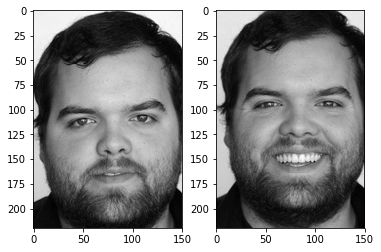

In [122]:
#1
import scipy.spatial.distance as dist

#neues bild
testImg = readImageToNumpyData(testpaths)
TestFace = testImg[3]

def findSimilarFace(Face, TrainFaces, EigenSpace, Eigenfaces):
    NormedFace = Face - averageimg
    transformed_NormedFace = createEigenSpace([NormedFace], Eigenfaces)
    #distances = np.array([dist.euclidean(point,transformed_NormedFace) for point in EigenSpace])
    distances = np.array([np.linalg.norm(point-transformed_NormedFace) for point in EigenSpace])
    maxIdx = distances.argmin(0)
    print distances
    print maxIdx
    #print distances[56]
    foundImg = TrainFaces[maxIdx]
    
    #plot face to find
    plt.subplot(121).imshow(Face.reshape(220, 150), cmap='gray')
    
    #plot normalized face to find
    #plt.subplot(131).imshow(NormedFace.reshape(220, 150), cmap='gray')
    
    #plot found face
    plt.subplot(122).imshow(foundImg.reshape(220, 150), cmap='gray')
    plt.show()
    print
    
    return foundImg
    
SimilarImg = findSimilarFace(TestFace, trainImg, EigenSpace, Usub)

__Aufgaben:__
1. Führen Sie die implementierte Gesichtserkennung für alle Bilder im Verzeichnis _test_ aus. Zeigen Sie jeweils das Testbild, das zugehörige erkannte Bild und die Distanz zwischen beiden Bildern an.
2. Bestimmen Sie für die Werte $K=5,K=10$ und $K=15$ ($K$ ist die Anzahl der verwendeten Eigenfaces) die Rate falsch erkannter Bilder. 

[ 810.57708  2306.4337  2007.3695  2493.2726  2370.8636  1170.9615
  2000.6066  2240.234  1920.6827  4696.7869  4376.1129  4382.7779
  6707.2265  6915.7924  6907.9079  3088.3605  2879.2396  3630.5429
  6851.0885  6533.8622  6769.7048  2474.8728  2532.745  3843.1281  2328.334
  2712.8491  3257.0746  5642.4762  4574.0374  3854.9723  2533.7558
  2160.4438  2421.1593  2783.188  2415.4865  2589.3967  2527.3043
  2273.2371  2466.4027  6903.4169  6614.1647  6856.2641  625.85252
  637.18407  891.06798  2990.6398  2857.3228  3363.4919  4331.4247
  3100.9201  4146.4543  3706.8228  2785.8957  2962.5134  5279.4559
  4272.9378  4217.9569  2039.2082  2670.2155  2936.3194  5455.6965
  4477.7967  4504.2871]
42


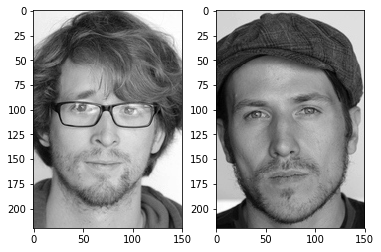


[ 3448.4431  5254.0881  5135.229  1125.4265  1181.9467  2898.6159
  4365.8292  4474.1675  3881.7592  7211.1088  7284.9946  7297.2492
  4249.3448  4171.7755  4336.4953  3844.3752  3786.8154  2973.3028
  3832.0354  3752.6898  3916.3557  4167.791  4509.237  2397.5492  4490.263
  5365.8435  5894.5323  2693.608  3197.0274  3585.2379  2197.3803
  3257.8385  2970.4603  5809.6598  5402.2677  5597.1511  4725.8186
  3642.1274  4248.8071  4103.4653  3608.1846  3944.0869  3462.4917
  3379.164  3392.4546  2923.6659  3177.0617  2879.3136  6485.8782
  5287.8859  6379.1409  5295.0639  5243.0753  5790.451  2931.769  3138.7377
  3307.6873  3288.7337  3542.4519  4162.5059  2348.2497  1684.5931
  1836.4412]
3


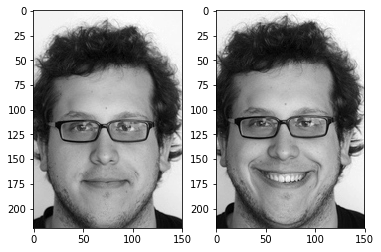


[ 2030.0673  2647.9082  2590.2907  2893.8055  2660.0563  1651.256
  549.92335  713.01896  394.22946  5575.4498  4816.6712  5199.312
  7563.3369  7550.203  7690.0813  3319.5922  3188.5484  3946.5414
  6936.4448  6498.3313  6732.1401  3030.3828  3006.1565  4264.5757
  2182.2322  2480.0506  3121.8774  6208.698  4843.8888  3984.3138
  3755.8721  3454.2122  3599.9794  3107.1633  2806.84  2881.2538  4055.1776
  3867.6444  4007.7699  7637.7217  7284.5191  7559.5401  1581.8577
  1601.6571  1743.7699  4022.3038  3899.2466  4412.1044  5300.9259
  4119.7529  5067.9993  4180.5583  3076.2323  3249.42  5942.0104  5003.7374
  4928.7386  2049.9589  2657.0028  2939.7083  5804.8872  4760.5355
  4774.0674]
8


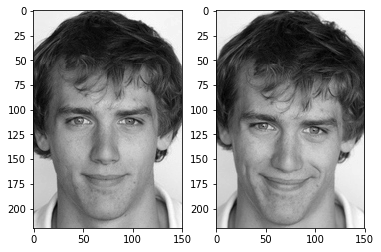


[ 3417.0224  2528.9151  2564.3811  5664.2849  5513.2875  3689.9204
  4161.2057  4334.3194  4333.0864  1376.6644  1714.1967  1397.2515
  9060.9429  9050.4907  9158.3056  4957.366  5008.5762  6295.2255
  9360.9024  8945.7768  9148.1402  4003.3249  3773.3642  6453.8713  4303.74
  3283.8537  2590.5908  7972.2083  5961.7072  4950.6273  4822.2789
  3975.8116  4284.9191  2785.6293  2931.6968  2883.1971  3607.1354
  4214.0819  4141.5618  8657.5996  8660.0332  8758.1568  3389.2237
  3440.3547  3242.9232  5086.0295  4470.9837  5640.3384  1755.4947
  1466.4215  1449.3444  2505.3215  1795.6339  1939.0406  7573.4712
  6471.7009  6452.3559  4654.4796  4545.5852  3937.5054  8411.9376
  7466.8801  7541.5633]
9


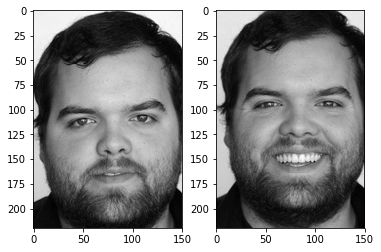


[ 6265.24  7987.7213  7867.9082  4722.4239  4809.8827  6223.543  7736.2563
  7841.317  7279.6018  9328.5666  9727.3676  9477.6431  698.43876
  1943.5908  1106.4053  6814.9918  6781.7622  5805.053  4317.3951
  4736.1596  4684.5007  6401.8058  6769.0831  3856.8524  7779.8907
  8594.8413  9024.6214  3015.7815  5196.6414  6041.5781  4662.9612
  5879.195  5591.0419  8421.3979  8032.42  8242.4501  6674.7784  5549.9653
  6169.1965  3212.221  2810.755  2984.8887  6615.2155  6544.3599  6517.2037
  5324.9452  5648.276  5079.9316  8660.2  7629.6065  8573.9713  8013.5231
  8237.6503  8829.4458  4323.9222  5346.8196  5613.2594  6218.6189
  6288.8827  6825.8617  3075.8628  3688.3075  3825.3255]
12


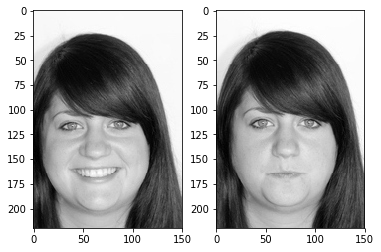


[ 4311.4266  5897.1662  5664.8068  2449.5315  2554.3817  3257.8394
  4459.9521  4608.4147  4056.9194  7116.1687  7576.8233  7356.5397
  6012.8597  5867.681  6101.9467  1904.3618  2019.9455  1061.7943
  4193.1051  3936.0778  4369.5633  3782.024  4171.819  3050.5329  3468.8595
  4464.3024  5117.4878  3275.7125  3168.1945  3256.3371  2917.3795
  3174.3728  2679.4283  6470.8828  6134.8009  6282.8286  5181.0834
  4202.3853  4747.5075  5433.0076  4850.8721  5341.7672  3815.9506
  3754.0789  3927.8594  2037.7298  2291.7601  2345.8711  6505.1055
  5520.9788  6544.9019  4874.8991  5023.5866  5651.0443  2555.6575
  1872.6269  1997.3575  2819.6085  2988.6954  3709.0829  3394.8419
  2383.9887  2337.2902]
17


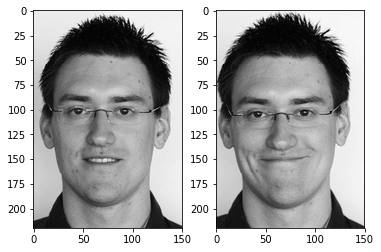


[ 6133.1516  7651.917  7707.8517  4090.0224  4000.054  5305.8805  6686.8389
  6716.6745  6105.2116  9098.4815  9377.2243  9470.7945  4243.6965
  2945.325  3852.3486  5677.0034  5907.0835  4960.3836  1724.1638
  1632.3607  1432.0653  6001.7525  6350.0028  3477.0592  6913.3507
  7541.3645  7828.9258  2011.218  2788.6683  3969.3891  4787.8838
  5818.7127  5361.9948  8282.4585  7929.312  8077.5774  7515.6185
  6424.0424  7102.066  2921.5736  2412.7375  2761.1664  6119.6934
  6039.9984  5930.1739  5152.3542  5200.9405  5223.5148  8363.2551
  7290.3929  8258.3264  6711.6198  7186.2165  8062.8708  3703.0844
  4868.3293  5191.972  5373.2527  5029.6926  5432.7106  2689.2818
  2852.3806  3092.0726]
20


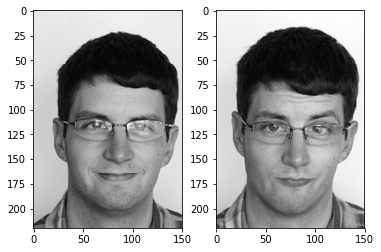


[ 6481.5155  8235.438  8158.0104  4451.164  4508.9311  6143.8437  7556.3907
  7628.0024  7037.5502  9803.2489  10111.6  9993.3966  1799.9972  1602.0886
  1653.7046  6547.9843  6575.7869  5417.7764  2851.2884  3348.8084
  3255.3031  6481.5279  6869.4418  3542.0571  7642.1931  8515.5724
  8982.9593  2174.4401  4646.2523  5637.1847  4880.2444  6110.0288
  5737.664  8738.0081  8337.829  8534.2477  7298.8099  6115.1753  6770.0269
  2907.6293  2216.6016  2581.7152  6687.7684  6610.3142  6589.5297
  5385.9705  5714.0682  5185.6729  9099.2566  8001.5661  9006.7779
  8038.2208  8298.4657  8973.052  3879.2318  5143.3308  5430.7967
  6024.3885  6028.4668  6630.4474  2028.5419  2890.2553  3051.0046]
13


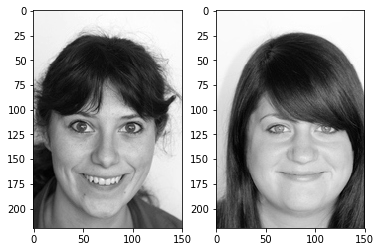


[ 3012.3432  3873.9528  3517.438  3226.0802  3214.6523  2365.571  2251.3176
  2478.6181  2301.5734  5614.7068  5510.4354  5416.6877  8017.7064
  8142.5442  8217.5178  1872.5711  1530.1492  2767.7255  7053.1162
  6675.4376  7040.5395  3114.4803  3210.8748  4619.2725  343.32354
  1811.9832  2892.87  6140.0666  5093.6608  4303.4094  3601.5445  2876.006
  2946.1769  4272.5539  4024.0656  4115.1673  3916.0292  3665.3451
  3774.3675  7902.7993  7470.0129  7838.0417  2206.0489  2219.3201
  2594.2336  3051.198  3032.4559  3485.1676  5311.6198  4382.9965  5287.242
  4156.0476  3345.3933  3428.8661  5305.9066  3916.5681  3736.3838
  2142.6011  2898.2113  3353.1286  5879.9639  4765.9219  4698.8745]
24


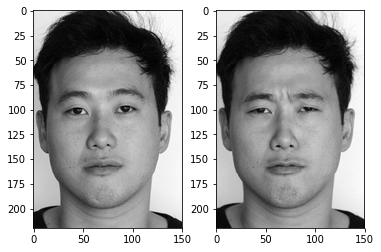


[ 3873.7812  5670.862  5401.6299  2098.0347  2301.5198  3223.4226  4836.485
  5018.5316  4444.8964  6778.5164  7354.1956  7010.3117  4774.6185
  4909.2638  4951.2736  2796.8891  2752.0891  1890.7724  4256.0136
  4205.0278  4537.7856  3754.7362  4171.8631  2641.6289  4050.8576
  4998.1688  5571.7198  2625.9352  3242.3393  3552.2652  1829.4532
  2555.4986  2057.2414  6211.0658  5844.7811  6033.9805  4358.7629
  3197.4224  3847.2786  4495.4937  3971.9602  4410.2374  3666.1467
  3594.8146  3722.5877  1413.0498  1866.0004  1466.5945  6094.4269
  5087.1684  6129.9791  4949.2359  5132.084  5706.1727  2014.5944
  1625.6256  1861.6799  3165.1681  3397.7994  4048.615  2910.5503
  2129.1289  2144.9216]
45


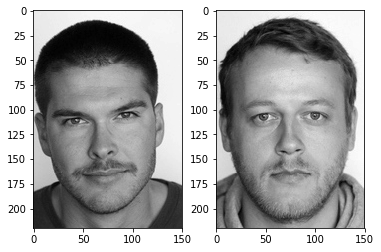


[ 2444.3406  3982.1614  3573.022  2581.1915  2749.2995  2244.6102
  3898.1597  4163.4207  3760.5775  4856.4158  5421.3181  4995.6462
  6332.874  6620.1111  6574.5967  2828.8892  2571.0716  2895.2369
  6481.8315  6339.7158  6620.5267  3583.5065  3817.5377  4235.4713
  2998.8018  3674.5957  4146.6858  4819.7889  4403.8548  4135.4884
  1195.2622  199.36854  592.33165  4457.485  4139.8652  4339.6115
  2301.2596  1529.3997  1955.195  5928.5885  5684.6574  5928.5636
  2171.2003  2122.3684  2276.1566  1404.8315  1379.7677  1599.1746
  4109.5875  3194.2617  4185.3726  3644.4392  3487.4088  3698.4521
  3830.5438  2634.6695  2576.7826  3236.3127  3675.2399  3973.2091
  5032.5107  4210.6019  4222.6395]
31


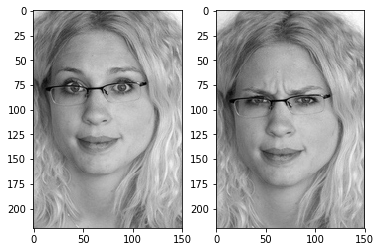


[ 693.90261  1513.4744  1371.4524  3219.0636  3051.4916  1941.522
  2288.8029  2453.2536  2321.2745  4604.5727  3834.1922  4089.3807
  6955.7188  7190.7197  7149.5013  4313.5911  4121.1969  4801.8271
  7559.1463  7251.4466  7413.7743  3215.0911  3153.876  4507.494  3346.954
  3420.4148  3731.5513  6372.6741  5247.4982  4531.6622  3250.7569
  3023.0384  3374.9424  1908.4959  1483.3239  1696.7734  2639.0888
  2722.7218  2755.5551  7302.992  7107.5456  7262.5573  1382.7428
  1414.3097  1324.48  4073.3289  3909.2492  4357.1852  4307.1769  3075.776
  4001.9243  4115.7783  3020.1291  3002.3968  6189.2823  5336.4464
  5294.0475  3026.8409  3520.5097  3592.2674  6132.6245  5265.9278
  5321.3909]
0


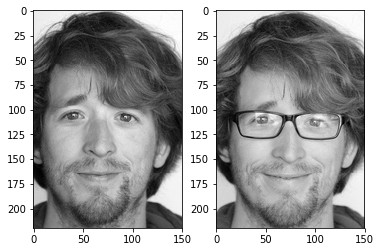


[ 2394.0186  3702.8565  3214.271  3513.672  3646.0087  3165.399  4433.2271
  4689.0781  4412.0282  4725.8493  5080.0277  4528.8562  6272.062
  6933.6245  6631.6781  4318.4058  3989.6933  4359.1187  7591.1605
  7514.8499  7736.5496  3968.2918  4108.3474  4809.3944  3996.4576
  4497.9117  4912.3306  5822.1091  5638.0769  5317.8741  2211.618
  1905.8106  2350.312  3944.0878  3632.255  3864.9639  910.40763  481.33217
  483.68581  6629.3121  6458.6804  6618.6449  2684.0687  2670.1185
  2789.1107  2917.8157  2984.4798  2904.1707  4169.3331  3307.1278
  4159.0644  4629.8123  4155.382  4070.3301  5140.0694  4163.8472
  4098.0323  4026.5628  4583.2203  4828.8892  5838.9533  5164.3252
  5179.0803]
37


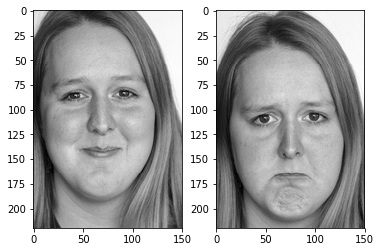


[ 5871.4307  7620.575  7514.4143  3867.5871  3974.9401  5296.4696
  7032.6864  7150.6197  6530.5407  8634.0059  9252.0194  9044.0767
  3189.3736  2678.5433  3055.8493  5474.7022  5569.5533  4469.2839
  2817.1416  3178.0679  3227.9715  5970.3288  6371.3436  3603.3966  6787.0
  7573.6418  7935.3705  920.51068  3481.4112  4616.3239  3788.4478
  4939.1662  4480.503  8201.8549  7827.355  8021.7628  6531.9707  5345.3177
  6035.1796  1803.5057  1085.9022  1633.7377  5920.8063  5837.4498
  5790.1591  4155.4633  4368.1475  3992.9473  7805.2446  6847.761
  7800.4074  6645.7656  7179.5397  7910.6644  2325.5392  3740.7229
  4092.8211  5523.2467  5410.9977  5882.7427  2315.7442  2706.922
  2890.7195]
27


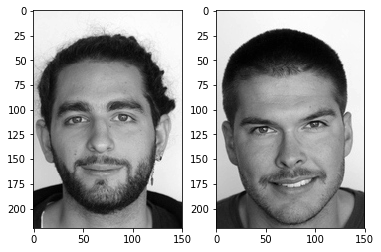


[ 978.20724  2103.9638  1784.1355  2757.1747  2660.7978  1080.4971
  1930.2078  2196.4296  1951.2587  4384.1895  4062.9867  4129.3208
  7214.4824  7348.0387  7394.7426  3128.1276  2923.9443  3775.0682
  7160.4991  6831.963  7069.1596  2967.1248  2987.6572  4418.3391  2163.663
  2401.9051  2875.3516  5945.3312  4734.3918  3987.2312  2661.5634
  2062.9073  2393.3758  2631.9168  2302.7877  2465.0228  2554.0074
  2475.6637  2576.3638  7096.545  6853.4866  7071.3176  220.62936
  288.32546  575.21702  3105.2302  2887.8785  3474.9357  3936.2958
  2763.1685  3774.6367  3309.5671  2299.5417  2360.0267  5409.2946
  4321.5531  4241.6225  2483.5935  3017.0448  3143.8237  5840.8049
  4862.3188  4890.4351]
42


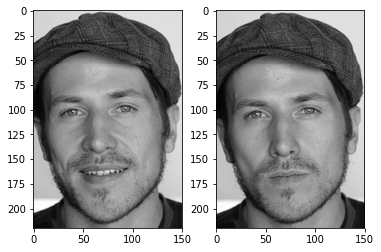


[ 3162.9301  4800.3566  4313.9237  2616.3771  2903.1844  2975.7538
  4279.7986  4539.8455  4149.9542  5887.581  6393.0985  5906.6476
  6276.5666  6768.9941  6606.6204  2766.1964  2322.4725  2263.9993
  6356.407  6292.8466  6627.6231  3907.3671  4198.2944  4225.3437
  3024.4458  4102.4054  4828.6176  4761.9471  4949.3276  4781.0775
  1762.055  1423.3765  1435.6568  5198.0259  4854.3795  5061.4221
  2803.0258  1922.3668  2261.004  6219.1747  5826.6846  6160.1765
  2839.1333  2795.4464  3097.2121  1266.2266  1838.0219  1061.178
  5234.4935  4368.0646  5334.4653  4732.2734  4480.4385  4581.6703
  3540.3673  2153.848  1971.5634  3351.7955  4021.4648  4566.3184
  4687.9644  3891.7575  3826.6902]
47


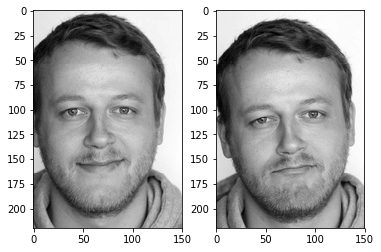


[ 3877.1773  3200.4127  3157.7126  6028.2402  5942.0482  4231.809
  5038.0349  5236.4357  5192.9308  1111.5262  2194.6327  1689.5485
  9225.5371  9253.7103  9335.9719  5607.9356  5609.272  6726.3553
  9754.5264  9421.291  9601.4763  5046.0564  4896.3151  7124.2193
  5028.4141  4214.6439  3591.4363  8192.097  6419.1425  5624.6854  4875.0
  4043.2444  4403.9581  3424.3205  3539.869  3548.9869  3569.9414
  4262.2524  4130.7434  8545.3494  8653.2529  8679.8191  3915.218  3950.102
  3729.4384  5304.5313  4704.102  5733.2947  683.40388  1302.7961
  490.81835  2780.5382  2502.6003  2385.0411  7628.2324  6579.1339
  6558.2319  5567.5356  5514.2445  4970.8706  8739.8877  7893.4773
  7976.6973]
50


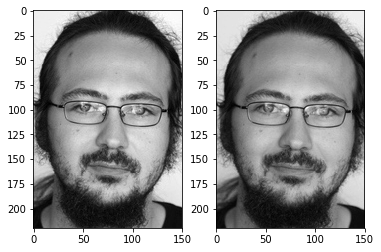


[ 2264.3084  2178.5992  1818.7024  4105.7262  4039.3064  2276.3008
  2502.1425  2758.8521  2771.7134  3565.9972  3312.1595  3322.8275
  8582.4675  8676.9048  8755.4605  3543.6036  3375.2152  4583.3151
  8352.7873  7984.4122  8247.4499  3704.5542  3614.0657  5726.0992
  2250.8787  1805.526  2006.2508  7109.9909  5605.7465  4705.8792
  3709.5233  2699.4827  3092.427  2576.3259  2461.3455  2527.4744
  2900.1169  3289.5513  3167.6794  8183.7384  8004.8322  8202.3788
  1708.4012  1768.1366  1841.117  3847.9349  3482.9751  4272.2181
  3228.9917  2432.4828  3143.8456  2898.5796  1618.3524  1097.4196
  6333.6789  5030.9043  4901.1287  3475.698  3856.654  3723.0127  7163.0055
  6155.1154  6170.2645]
53


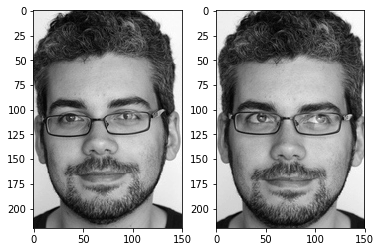


[ 5055.1705  6863.8081  6559.6245  3037.96  3355.2265  4395.786  6046.7201
  6236.1795  5681.5727  7763.2584  8485.2265  8113.809  5103.8548
  5230.8561  5284.0683  3866.1947  3767.9852  2510.01  4283.1908  4465.6511
  4779.2007  5405.0776  5808.5483  4082.498  5088.5968  6134.6472
  6704.9163  2617.5873  4140.3121  4756.9221  2640.6954  3366.8221
  2910.4583  7406.6132  7034.744  7241.373  5250.7034  4111.8521  4682.6196
  4127.8417  3608.4023  4039.0739  4806.3539  4728.8768  4854.1323
  2322.8803  2837.8871  1878.9509  6896.1379  6047.4852  7015.1287
  5834.4356  6186.0631  6656.0746  750.06216  1226.8263  1506.9366
  4694.1721  4947.2148  5541.4429  3027.2995  2731.2896  2715.6237]
54


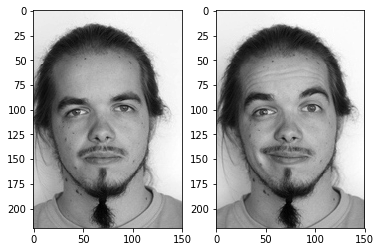


[ 3491.8852  4936.9985  4823.9259  2202.9633  2018.0041  2664.6732
  3449.3374  3528.6182  2964.3564  6778.9782  6817.5858  6772.4178
  5623.5832  5504.2318  5695.9903  2426.0804  2550.4532  2463.7424
  4488.6888  4068.2227  4400.4092  2407.8026  2778.3513  1704.9007
  3320.703  4074.482  4701.3069  3828.1127  3045.8033  2692.9792  3188.3412
  3514.8126  3198.4364  5466.0693  5129.1596  5250.219  4910.0355  4043.241
  4575.5422  5883.6459  5329.0426  5766.0318  3218.2379  3172.4836
  3298.5964  2915.3024  2988.2266  3359.3984  6402.5699  5216.3147
  6283.5607  4857.9901  4641.7657  5330.3876  4045.4342  3568.3541
  3669.6613  1395.3265  1569.9018  2531.2314  3590.3008  2466.1064
  2486.2181]
57


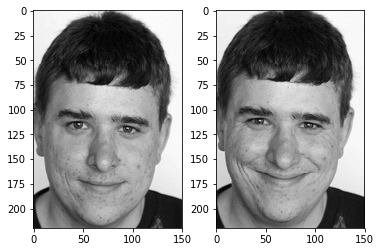


[ 5662.8957  7520.7274  7364.3629  3288.6089  3443.384  5233.3499
  6585.6919  6677.7569  6095.6712  9265.196  9525.0232  9402.2437  2908.59
  3040.7563  3030.4438  5469.9992  5412.7224  4092.3243  2744.0584
  3176.3018  3272.8152  5885.4893  6289.2149  3146.1723  6472.682
  7511.9352  8108.1413  1829.3747  4384.7739  5231.927  3948.5313
  5121.3328  4754.5044  8026.7176  7607.5552  7814.508  6478.134  5267.6792
  5890.8465  3402.8313  2599.8606  3087.6219  5732.9652  5652.9546
  5710.0535  4329.5875  4788.2155  4036.0724  8520.0274  7401.6263
  8461.7875  7395.1047  7527.0681  8091.2646  2804.3581  3919.8304
  4152.6922  5144.2812  5353.1309  6075.9513  741.81912  1667.6588
  1768.6349]
60


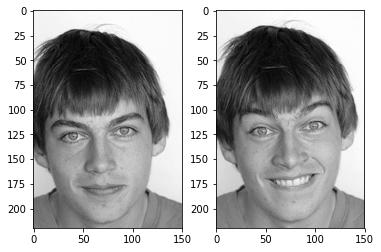

In [123]:
for img in testImg:
    findSimilarFace(img, trainImg, EigenSpace, Usub)